In [1]:
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 35.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.31.0 which is incompatible.


In [2]:
!pip install taxicab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import osmnx as ox
import numpy as np
import geopandas as gpd

In [4]:
G = ox.graph_from_place('Московская область', network_type = 'drive')

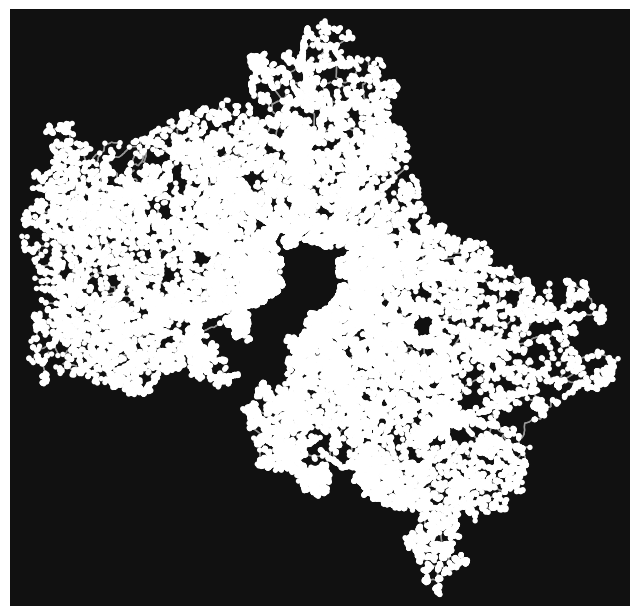

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [5]:
ox.plot_graph(G)

In [6]:
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

In [7]:
# fr = ox.graph_from_place('ул. Горького, 18, Ступино, Московская обл., 142802', network_type='drive')
# node_id = list(fr.nodes)[0]
# orig = (fr.nodes[node_id]['x'], fr.nodes[node_id]['y'])
# fr = ox.graph_from_place('Московская обл, Ступино г, Гридюкино д, Рябиновая ул, дом № 13.', network_type='drive')
# node_id = list(fr.nodes)[0]
# dest = (fr.nodes[node_id]['x'], fr.nodes[node_id]['y'])

In [8]:
orig = (39.08710, -84.31050)
dest = (39.08800, -84.32000)

In [9]:
import taxicab as tc

In [10]:
route = tc.distance.shortest_path(G, orig, dest)

In [11]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from geopy.geocoders import Nominatim
from functools import partial
from geopy import Photon

In [15]:
geolocator = Nominatim(user_agent="diploma")
geocode = partial(geolocator.geocode, language="ru", country_codes = "RU")

In [ ]:
# location = geocode('ул. Горького, 18, Ступино, Московская обл., 142802')
# print((location.latitude, location.longitude))
# orig = (location.latitude, location.longitude)

# location = geocode('Московская обл, Тишково, 65')
# print((location.latitude, location.longitude))
# dest = (location.latitude, location.longitude)

In [37]:
route = tc.distance.shortest_path(G, orig, dest)

In [38]:
route[0]

177197.9004094188

In [21]:
import networkx as nx

In [51]:
nx.shortest_path_length(G, source = ox.distance.nearest_nodes(G, orig[1], orig[0], return_dist=False), target = ox.distance.nearest_nodes(G, dest[1], dest[0], return_dist=False), weight='length')

177050.98299999995

Отношение дистанций 0.99917088515

In [49]:
ox.distance.nearest_nodes(G, orig[1], orig[0], return_dist=False)

450839360

In [50]:
ox.distance.nearest_nodes(G, dest[1], dest[0], return_dist=False)

3783779619

In [47]:
orig

(54.89075105, 38.067744953665205)

In [48]:
dest

(56.090464, 37.738133)

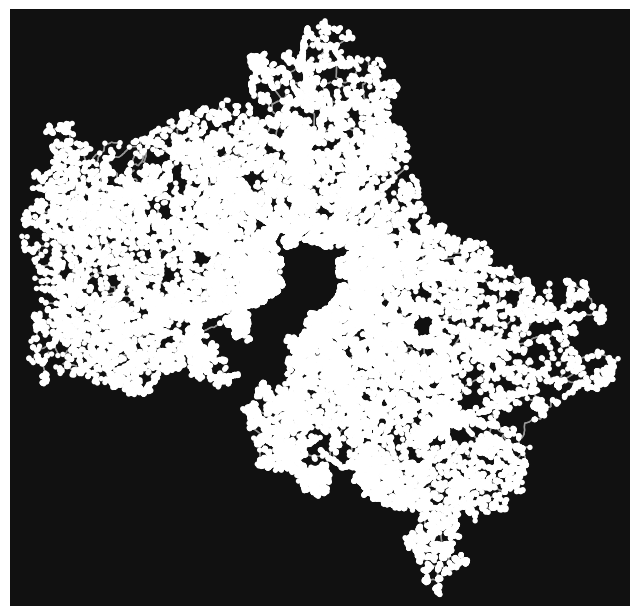

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [25]:
tc.plot.plot_graph_route(G, route)

In [ ]:
# route[0]

In [26]:
adresses = (
    'ул. Горького, 18, Ступино, Московская обл., 142802',
    'Московская обл, Тишково 65',
    'Московская обл, СНТ Немцово-Немцово тер., 221',
    'Московская обл, Ступино, Карпова ул, 14',
    'Московская обл, Верзилово с, Шаховская ул, 31',
    'М.О., г/о.Ступино, д.Дубечино, ТСН Гринвуд',
    'М.О., г/о.Ступино, с.Ситне-Щелканово, ул.Московская, уч.25А',
    'М.О., г/о.Ступино, д.Петрово, ул.Ласковая, уч.13.'
            )

In [ ]:
# points = [{'name':element, 'latitude':geocode(element).latitude, 'longitude':geocode(element).longitude} for element in adresses]
# dest = (location.latitude, location.longitude)]

In [ ]:
# for element in adresses:
#     print(element)
#     geocode(element).latitude

In [ ]:
# points

In [27]:
import requests

In [ ]:
r = requests.get('https://geocode-maps.yandex.ru/1.x', params = {'geocode':adresses[-1], 'apikey':'2486ab02-2c39-4e68-8d2a-50c7deec2a70', 'format':'json'})

In [ ]:
# lon, lat = r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos'].split()

In [ ]:
# lon

In [28]:
from typing import List, Tuple

In [55]:
def get_coordinates(names: list[str]) -> list[tuple[str, float, float]]:
    result = []
    for element in names:
        try:
            result.append((element, float(geocode(element).latitude), float(geocode(element).longitude)))
        except:
            r = requests.get('https://geocode-maps.yandex.ru/1.x', params = {'geocode':element, 'apikey':'2486ab02-2c39-4e68-8d2a-50c7deec2a70', 'format':'json'})
            lon, lat = list(map(float, r.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos'].split()))
            result.append((element, lat, lon))
    return result

In [32]:
print(get_coordinates(adresses))

[('ул. Горького, 18, Ступино, Московская обл., 142802', 54.89075105, 38.067744953665205), ('Московская обл, Тишково 65', 56.090464, 37.738133), ('Московская обл, СНТ Немцово-Немцово тер., 221', 55.172558, 37.902266), ('Московская обл, Ступино, Карпова ул, 14', 54.895326, 38.150839), ('Московская обл, Верзилово с, Шаховская ул, 31', 55.0201, 38.098342), ('М.О., г/о.Ступино, д.Дубечино, ТСН Гринвуд', 54.892726, 38.546835), ('М.О., г/о.Ступино, с.Ситне-Щелканово, ул.Московская, уч.25А', 51.330406, 38.048755), ('М.О., г/о.Ступино, д.Петрово, ул.Ласковая, уч.13.', 54.999852, 38.113981)]


In [91]:
def calculate_distance_matrix(places: list[tuple[str, float, float]]):
    matrix = []
    for i in range(len(places)):
        matrix.append([])
        for j in range(len(places)):
            matrix[i].append(int(nx.shortest_path_length(G, source = ox.distance.nearest_nodes(G, places[i][2], places[i][1], return_dist=False), target = ox.distance.nearest_nodes(G, places[j][2], places[j][1], return_dist=False), weight='length')))
    return matrix

Вычислить матрицу расстояний
Приведенная ниже функция вычисляет евклидово расстояние между любыми двумя точками в данных и сохраняет его в массиве. Поскольку решатель маршрутов работает с целыми числами, функция округляет вычисленные расстояния до целых чисел. Округление не влияет на решение в этом примере, но может в других случаях. См. Масштабирование матрицы расстояний , чтобы избежать возможных проблем с округлением.

In [90]:
def calculate_precise_distance_matrix(places: List[Tuple[str, float, float]]):
    matrix = []
    for i in range(len(places)):
        matrix.append([])
        for j in range(len(places)):
           matrix[i].append(int(tc.distance.shortest_path(G, places[i][1:], places[j][1:])))
    return matrix

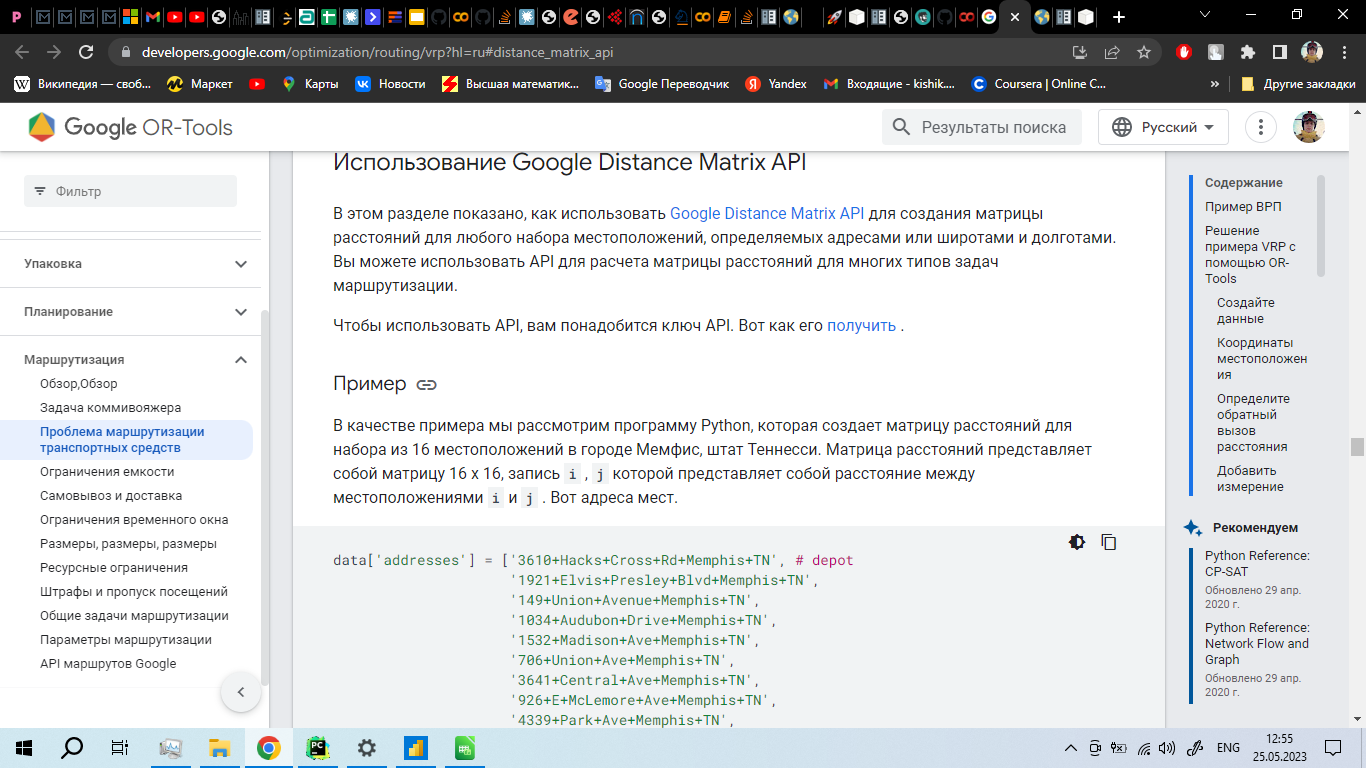

In [35]:
points = get_coordinates(adresses)

In [36]:
orig = (points[0][1], points[0][2])
dest = (points[1][1], points[1][2])

In [92]:
matrix = calculate_distance_matrix(get_coordinates(adresses))

In [54]:
matrix

[[0,
  177050.98299999995,
  36956.824999999975,
  9442.714,
  25025.545999999995,
  43505.46299999999,
  95400.854,
  21465.170999999995],
 [176906.693,
  0,
  152022.97000000003,
  180650.415,
  163570.87299999996,
  186734.63799999995,
  271337.13299999986,
  163974.637],
 [37004.36300000001,
  155109.89200000002,
  0,
  42192.202,
  27794.78400000001,
  76254.95100000006,
  130115.08600000001,
  31504.25000000001],
 [10121.574999999999,
  181288.985,
  42251.03999999997,
  0,
  30243.384999999995,
  41339.05399999999,
  99289.787,
  25703.172999999995],
 [24942.096999999994,
  164182.28,
  27852.674000000006,
  30129.935999999998,
  0,
  59220.792,
  119725.329,
  4540.212],
 [44059.769000000015,
  186639.693,
  76189.23400000003,
  41214.49900000001,
  59116.419,
  0,
  84602.495,
  54576.20700000001],
 [95506.67600000004,
  271388.8889999999,
  130033.83300000003,
  99386.74700000006,
  118625.38300000006,
  84749.19599999998,
  0,
  116316.94100000005],
 [21912.106,
  164608.578

In [59]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = calculate_distance_matrix(get_coordinates(adresses))
    data['num_vehicles'] = 4
    data['depot'] = 0
    return data

In [61]:
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 33.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


In [62]:
import ortools

In [68]:
from ortools.constraint_solver import pywrapcp

In [70]:
data = create_data_model()

In [71]:
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                       data['num_vehicles'], data['depot'])
routing = pywrapcp.RoutingModel(manager)

In [72]:
def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

In [73]:
dimension_name = 'Distance'
routing.AddDimension(
    transit_callback_index,
    0,  # no slack
    3000,  # vehicle maximum travel distance
    True,  # start cumul to zero
    dimension_name)
distance_dimension = routing.GetDimensionOrDie(dimension_name)
distance_dimension.SetGlobalSpanCostCoefficient(100)

In [74]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    print('Maximum of the route distances: {}m'.format(max_route_distance))

In [94]:
def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        500000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Set penalty for vehicle use
    # routing.SetFixedCostOfAllVehicles(100)
    
    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
    else:
        print('No solution found !')

In [80]:
from ortools.constraint_solver import routing_enums_pb2

In [95]:
main()

Objective: 36065948
Route for vehicle 0:
 0 -> 0
Distance of the route: 0m

Route for vehicle 1:
 0 -> 0
Distance of the route: 0m

Route for vehicle 2:
 0 ->  1 -> 0
Distance of the route: 353956m

Route for vehicle 3:
 0 ->  2 ->  4 ->  7 ->  3 ->  5 ->  6 -> 0
Distance of the route: 316392m

Maximum of the route distances: 353956m
